In [1]:
import pandas as pd
from scipy.stats import ttest_ind, mannwhitneyu



In [2]:
from rpy2 import robjects
from rpy2.robjects import Formula

from rpy2.robjects import pandas2ri
pandas2ri.activate()

from rpy2.robjects.packages import importr



In [3]:
base = importr("base")
stats = importr("stats")
DESeq2 = importr("DESeq2")



C:\Users\taran\anaconda3\lib\site-packages\rpy2\robjects\vectors.py:980: UserWarning: R object inheriting from "POSIXct" but without attribute "tzone".
  warnings.warn('R object inheriting from "POSIXct" but without '


In [4]:
# Load read counts table
counts = pd.read_csv("https://raw.githubusercontent.com/s-a-nersisyan/HSE_bioinformatics_2021/master/seminar13/colon_cancer_tumor_vs_normal_unpaired_counts.tsv", sep="\t", index_col=0)

# Define meta
meta = pd.DataFrame({"Tissue": ["Tumor"]*5 + ["Normal"]*5}, index=counts.columns)
meta["Tissue"] = stats.relevel(robjects.vectors.FactorVector(meta["Tissue"]), ref="Normal")

# Calculate normalization factors
dds = DESeq2.DESeqDataSetFromMatrix(countData=counts, colData=meta, design=Formula("~ Tissue"))
dds = DESeq2.DESeq(dds)

res = DESeq2.results(dds, name="Tissue_Tumor_vs_Normal")
res = DESeq2.lfcShrink(dds, coef="Tissue_Tumor_vs_Normal", type="apeglm")
res = pd.DataFrame(base.as_data_frame(res))
res.index = counts.index
res = res.sort_values("padj")
res = res.loc[res["padj"] < 0.05]
#res = res.loc[res["log2FoldChange"].abs() >= 1]

print(res.iloc[:10].index)



R[write to console]: estimating size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing

R[write to console]: using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895



Index(['FABP6', 'ETV4', 'IER5L', 'KRT80', 'FUT1', 'C17orf96', 'CLDN1', 'ATG9B',
       'KIAA1257', 'SLC51B'],
      dtype='object')


In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/s-a-nersisyan/HSE_bioinformatics_2021/master/seminar13/colon_cancer_tumor_vs_normal_unpaired_FPKM.tsv", sep="\t", index_col=0)
df["ttest"] = [ttest_ind(df.loc[gene].iloc[0:5], df.loc[gene].iloc[5:10])[1] for gene in df.index]
df = df.sort_values("ttest")
print('ttest:', df.iloc[:10].index)



ttest: Index(['C17orf96', 'IER5L', 'FUT1', 'CDH3', 'FXYD5', 'ZNHIT2', 'CLCA4',
       'ACADSB', 'MT1F', 'PIGN'],
      dtype='object')


In [6]:
df["mannwhitneyu"] = [mannwhitneyu(df.loc[gene].iloc[0:5], df.loc[gene].iloc[5:10])[1] for gene in df.index]
df = df.sort_values("mannwhitneyu")
print('mannwhitneyu:', df.iloc[:10].index)



mannwhitneyu: Index(['SFTA2', 'CTD-2147F2.1', 'RAET1L', 'LINC00460', 'AC007128.1',
       'RP5-884M6.1', 'CST1', 'VAC14-AS1', 'LINC00858', 'RP11-399O19.9'],
      dtype='object')


In [8]:
deseq2 = set(['FABP6', 'ETV4', 'IER5L', 'KRT80', 'FUT1', 'C17orf96', 'CLDN1', 'ATG9B', 'KIAA1257', 'SLC51B'])
ttest = set(['C17orf96', 'IER5L', 'FUT1', 'CDH3', 'FXYD5', 'ZNHIT2', 'CLCA4', 'ACADSB', 'MT1F', 'PIGN'])
mann = set(['SFTA2', 'CTD-2147F2.1', 'RAET1L', 'LINC00460', 'AC007128.1', 'RP5-884M6.1', 'CST1', 'VAC14-AS1', 'LINC00858', 'RP11-399O19.9'])

print('deseq2+ttest', deseq2.intersection(ttest)) #позволяет найти пересечение множества с одной или более последовательностями поддерживающих итерирование
print('deseq2+mann', deseq2.intersection(mann))
print('ttest+mann', ttest.intersection(mann))


deseq2+ttest {'IER5L', 'FUT1', 'C17orf96'}
deseq2+mann set()
ttest+mann set()


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt



<function matplotlib.pyplot.show(*args, **kw)>

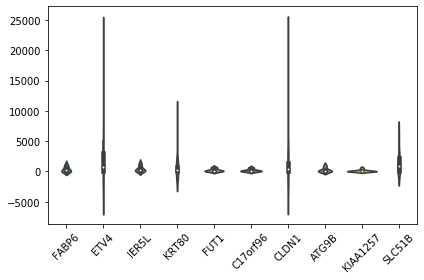

In [13]:
DEseq2=counts.loc[['FABP6', 'ETV4', 'IER5L', 'KRT80', 'FUT1', 'C17orf96', 'CLDN1', 'ATG9B', 'KIAA1257', 'SLC51B']].T
sns.violinplot(data=DEseq2)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

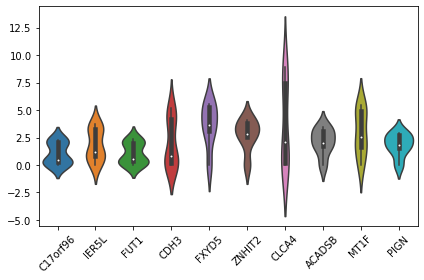

In [15]:
Ttest=df.loc[['C17orf96', 'IER5L', 'FUT1', 'CDH3', 'FXYD5', 'ZNHIT2', 'CLCA4', 'ACADSB', 'MT1F', 'PIGN']].T
sns.violinplot(data=Ttest)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show



<function matplotlib.pyplot.show(*args, **kw)>

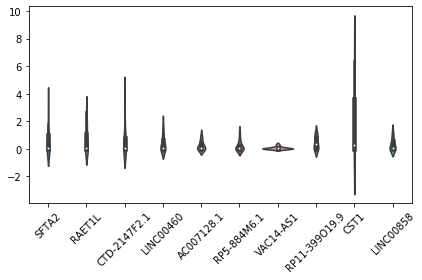

In [18]:
Mann=df.loc[['SFTA2', 'RAET1L', 'CTD-2147F2.1', 'LINC00460', 'AC007128.1', 'RP5-884M6.1', 'VAC14-AS1', 'RP11-399O19.9', 'CST1', 'LINC00858']].T
sns.violinplot(data=Mann)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show

In [ ]:
#надо транспонировать ибо иначе за иксы будут не гены а номера образцов пациентв